In [1]:
## 고쳤는데도 안 될꺼야??

In [1]:
PATH="C:\\Users\\98gud\\Desktop\\paper\\open\\"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

import torch
import category_encoders as ce

from torch.utils.data import DataLoader
import torch.nn as nn

In [2]:
train=pd.read_csv(PATH+"train.csv")
original=pd.read_csv(PATH+"train.csv")
test=pd.read_csv(PATH+"test.csv")
sample_submission=pd.read_csv(PATH+"sample_submission.csv")

In [3]:
display(train.head())

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [4]:
train.dtypes

index              int64
gender            object
car               object
reality           object
child_num          int64
income_total     float64
income_type       object
edu_type          object
family_type       object
house_type        object
DAYS_BIRTH         int64
DAYS_EMPLOYED      int64
FLAG_MOBIL         int64
work_phone         int64
phone              int64
email              int64
occyp_type        object
family_size      float64
begin_month      float64
credit           float64
dtype: object

In [5]:
print(original.columns)
print(test.columns)

Index(['index', 'gender', 'car', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email',
       'occyp_type', 'family_size', 'begin_month', 'credit'],
      dtype='object')
Index(['index', 'gender', 'car', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email',
       'occyp_type', 'family_size', 'begin_month'],
      dtype='object')


In [6]:
train.drop(train[['family_type','edu_type','gender','car','reality','work_phone','email','phone']],axis=1,inplace=True)

In [7]:
test.drop(test[['family_type','edu_type','gender','car','reality','work_phone','email','phone']],axis=1,inplace=True)

In [8]:
train.replace({'income_type':'Student'},{'income_type':1},inplace=True)
train.replace({'house_type':'Rented apartment'},{'house_type':1},inplace=True)

train.loc[train['income_type']!=1,['income_type']]=0
train.loc[train['house_type']!=1,['house_type']]=0

train[['income_type','house_type']]=train[['income_type','house_type']].astype(float)

test.replace({'income_type':'Student'},{'income_type':1},inplace=True)
test.replace({'house_type':'Rebted apartment'},{'house_type':1},inplace=True)

test.loc[test['income_type']!=1,['income_type']]=0
test.loc[test['house_type']!=1,['house_type']]=0

test[['income_type','house_type']]=test[['income_type','house_type']].astype(float)

In [9]:
## 자 이제 하이라이트인 occupy는 어떻게 할 것인가? 일단 변수가 미치는 영향부터 보도록 하자


pd.crosstab(index=train['occyp_type'], columns=train['credit']).apply(lambda r: r/r.sum(), axis=1)

credit,0.0,1.0,2.0
occyp_type,,,
Accountants,0.130820,0.251663,0.617517
Cleaning staff,0.099256,0.230769,0.669975
Cooking staff,0.126915,0.240700,0.632385
Core staff,0.131141,0.235072,0.633787
Drivers,0.118730,0.227302,0.653968
HR staff,0.112903,0.064516,0.822581
High skill tech staff,0.118269,0.259615,0.622115
IT staff,0.195122,0.243902,0.560976
Laborers,0.129876,0.239805,0.630319


<BarContainer object of 18 artists>

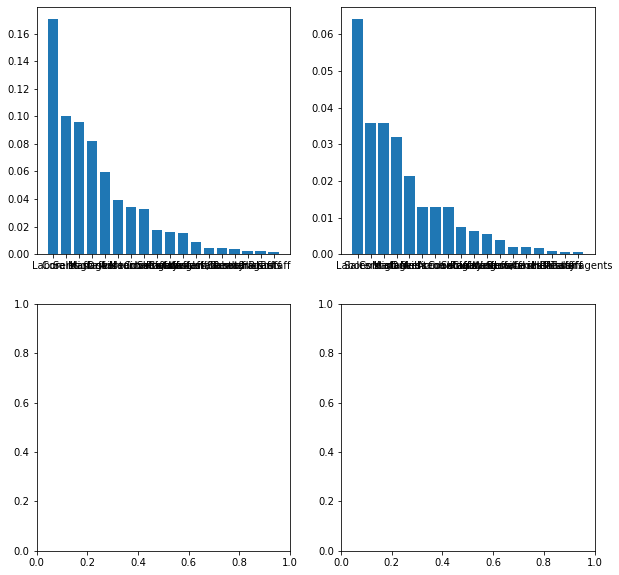

In [10]:
fig,axes=plt.subplots(2,2,figsize=(10,10))
axes[0][0].bar(train['occyp_type'].value_counts().index,train['occyp_type'].value_counts()/train.shape[0])
axes[0][1].bar(test['occyp_type'].value_counts().index,test['occyp_type'].value_counts()/train.shape[0])

In [11]:
train.replace({'occyp_type':'HR staff'},{'occyp_type':1},inplace=True)
train.replace({'occyp_type':'IT staff'},{'occyp_type':-2},inplace=True)
train.replace({'occyp_type':'Waiters/barmen staff'},{'occyp_type':-1},inplace=True)


train['occyp_type'].unique()

array([nan, 'Laborers', 'Managers', 'Sales staff',
       'High skill tech staff', 'Core staff', 'Drivers', 'Medicine staff',
       'Accountants', 'Realty agents', 'Security staff', 'Cleaning staff',
       'Private service staff', 'Cooking staff', 'Secretaries', 1, -2,
       'Low-skill Laborers', -1], dtype=object)

In [12]:
test.replace({'occyp_type':'HR staff'},{'occyp_type':1},inplace=True)
test.replace({'occyp_type':'IT staff'},{'occyp_type':-2},inplace=True)
test.replace({'occyp_type':'Waiters/barmen staff'},{'occyp_type':-1},inplace=True)

test['occyp_type'].unique()

array([nan, 'Core staff', 'Laborers', 'Drivers', 'Managers',
       'Sales staff', 'Cleaning staff', 'Accountants', 'Cooking staff',
       'Medicine staff', 'Realty agents', -1, 'Private service staff',
       'High skill tech staff', 'Low-skill Laborers', 'Security staff',
       'Secretaries', 1, -2], dtype=object)

In [13]:
occupation_miss=np.zeros(train.shape[0])
miss_index=train.loc[train['occyp_type'].isna()].index
occupation_miss[miss_index]=1
train['occyp_miss']=occupation_miss                 


In [14]:
occupation_miss=np.zeros(test.shape[0])
miss_index=test.loc[test['occyp_type'].isna()].index
occupation_miss[miss_index]=1
test['occyp_miss']=occupation_miss                 

In [15]:
train.loc[(train['occyp_type']!=1) &( train['occyp_type']!=-1) & (train['occyp_type']!=-2) ,['occyp_type']]=0

In [16]:
test.loc[(test['occyp_type']!=1) &( test['occyp_type']!=-1) & (test['occyp_type']!=-2) ,['occyp_type']]=0

In [17]:
## EDA를 통해서 FLAG_MOBIL이 1의 값만 있다는 사실을 알았으므로 제거

train.drop(train[['FLAG_MOBIL']],axis=1,inplace=True)
# train.drop(train[['credit']],axis=1,inplace=True)
train.drop(train[['index']],axis=1,inplace=True)

In [18]:
## EDA를 통해서 FLAG_MOBIL이 1의 값만 있다는 사실을 알았으므로 제거

test.drop(test[['FLAG_MOBIL']],axis=1,inplace=True)
test.drop(test[['index']],axis=1,inplace=True)

In [93]:
#train

In [20]:
# ## 효율적인 변수 이용을 위한 변수 선택

# from sklearn.decomposition import PCA

# pca=PCA(n_components=5)
# train_pca=pd.DataFrame(pca.fit_transform(train))
# pca=PCA(n_components=5)
# test_pca=pd.DataFrame(pca.fit_transform(test))

In [19]:
train[['occyp_type']]=train[['occyp_type']].astype(float)
test[['occyp_type']]=test[['occyp_type']].astype(float)

In [20]:
train_x=train.drop(train[['credit']],axis=1)
train_y=pd.DataFrame(train['credit'],columns=['credit'])

In [21]:
from pycaret.classification import *
exp1 = setup(train, target = 'credit')

,Description,Value
0,session_id,8587
1,Target,credit
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(26457, 11)"
5,Missing Values,False
6,Numeric Features,6
7,Categorical Features,4
8,Ordinal Features,False
9,High Cardinality Features,False


In [22]:
model=create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6976,0.6830,0.4214,0.6886,0.6188,0.2281,0.3183
1,0.6906,0.6846,0.4183,0.6578,0.6142,0.2202,0.2931
2,0.7036,0.6940,0.4296,0.7024,0.6275,0.2474,0.3374
3,0.6944,0.6741,0.4197,0.7033,0.6159,0.2232,0.3051
4,0.6976,0.6850,0.4228,0.6723,0.6206,0.2354,0.3156
5,0.7019,0.7029,0.4342,0.7202,0.6293,0.2502,0.3299
6,0.6982,0.7008,0.4257,0.7089,0.6229,0.2419,0.3148
7,0.6971,0.6999,0.4232,0.7107,0.6204,0.2349,0.3117
8,0.6992,0.6949,0.4272,0.6895,0.6246,0.2440,0.3186
9,0.6964,0.7040,0.4183,0.6799,0.6163,0.2231,0.3127


In [23]:
prep_pipe = get_config("prep_pipe")
prep_pipe.steps.append(['trained_model', model])
prections = prep_pipe.predict_proba(test)
prections

array([[0.05363296, 0.13640754, 0.8099595 ],
       [0.10789426, 0.15283806, 0.73926768],
       [0.0499651 , 0.06935699, 0.88067791],
       ...,
       [0.0771454 , 0.11438388, 0.80847073],
       [0.08742608, 0.1842122 , 0.72836172],
       [0.07961798, 0.31639116, 0.60399086]])

In [24]:
sample_submission['0']=prections[:,0]
sample_submission['1']=prections[:,1]
sample_submission['2']=prections[:,2]
sample_submission.to_csv(PATH+"lgbm.csv",index=False)